# <center> UVOT SED correction </center>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from uvot_extinc_corr_keepmodifing import ExtinctionOld, ExtinctionNew, ExtinctionCorrectionUVOTSED, ExtinctionCorrectionUVOTLC

In [ ]:
# Create a list of inputs

m = [14.42,13.99,13.62,15.31,14.62,15.37]          # Uncorrected magnitude
em = [0.03,0.04,0.03,0.05,0.05,0.05]               # Uncorrected magnitude error
A = [0.8744,0.8744,0.8744,0.8744,0.8744,0.8744]    # Av_{s&f} (2011)
Ebv = [0.2802,0.2802,0.2802,0.2802,0.2802,0.2802]  # E_(B-V) (2011)
x = np.column_stack((m,em,A))
y = np.column_stack((m,em,Ebv))
np.savetxt('demo_uvot_data.txt',x)
np.savetxt('demo_uvot_data_Ebv.txt',y)

In [ ]:

filters = ["B", "U", "V", "M2", "W1", "W2"] # Available filters 

# Do the extinction correction
extinction = ExtinctionCorrectionUVOTSED(data_file = "demo_uvot_data.txt", filters = filters, method="New")  # Use "Old" or "New"
results = extinction.perform_correction()
print(results)

In [ ]:
# Plot the output UVOT SED
extinction.plot_results(results)


In [ ]:
# Write the results in a file 
extinction.save_results(results,"corrected")


In [ ]:
#. Here i have used a constant E_b-v to calculate A_lambda for all filters

extinction = ExtinctionCorrectionUVOTSED(data_file = "demo_uvot_data_Ebv.txt", method="Old")  # Use "Old" or "New"
results = extinction.perform_correction()
print(results)

# <center> UVOT light curve correction </center>

In [2]:
lcv = pd.read_csv('PKS0736_Vfilter_LC.csv', usecols=[1, 2, 3])
time = lcv["MJD"]
mag = lcv["Mag_vega"]
magerr = lcv["Mag_err_vega"]
lcv

,Mag_vega,Mag_err_vega,MJD
0,15.11,0.04,56984.872905
1,15.89,0.07,56991.532627
2,15.91,0.05,56998.598600
3,16.01,0.06,57007.638449
4,16.33,0.06,57014.043032
5,16.43,0.06,57021.488183
6,15.81,0.06,57075.073866
7,16.60,0.07,55126.761111
8,15.52,0.06,55651.206250
9,17.24,0.18,55860.797917


Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Working with New code
Results saved to demo_lightcurve
[56984.87290509, 56991.53262731, 56998.59859954, 57007.63844907, 57014.04303241, 57021.48818287, 57075.07386574, 55126.76111111, 55651.20625, 55860.79791667, 58627.15386574, 58630.07541667, 60416.11802083, 60426.58673611, 60436.51314815, 60446.18188657, 60456.18190972, 56982.66662037, 57005.3090162, 57073.80943287] [2.639537981393075e-11, 1.2868499666391046e-11, 1.2633623077232775e-11, 1.1522001186773236e-11, 8.580802687172806e-12, 7.825785061075894e-12, 1.38524922424771e-11, 6.691568307916215e-12, 1.809372209519577e-11, 

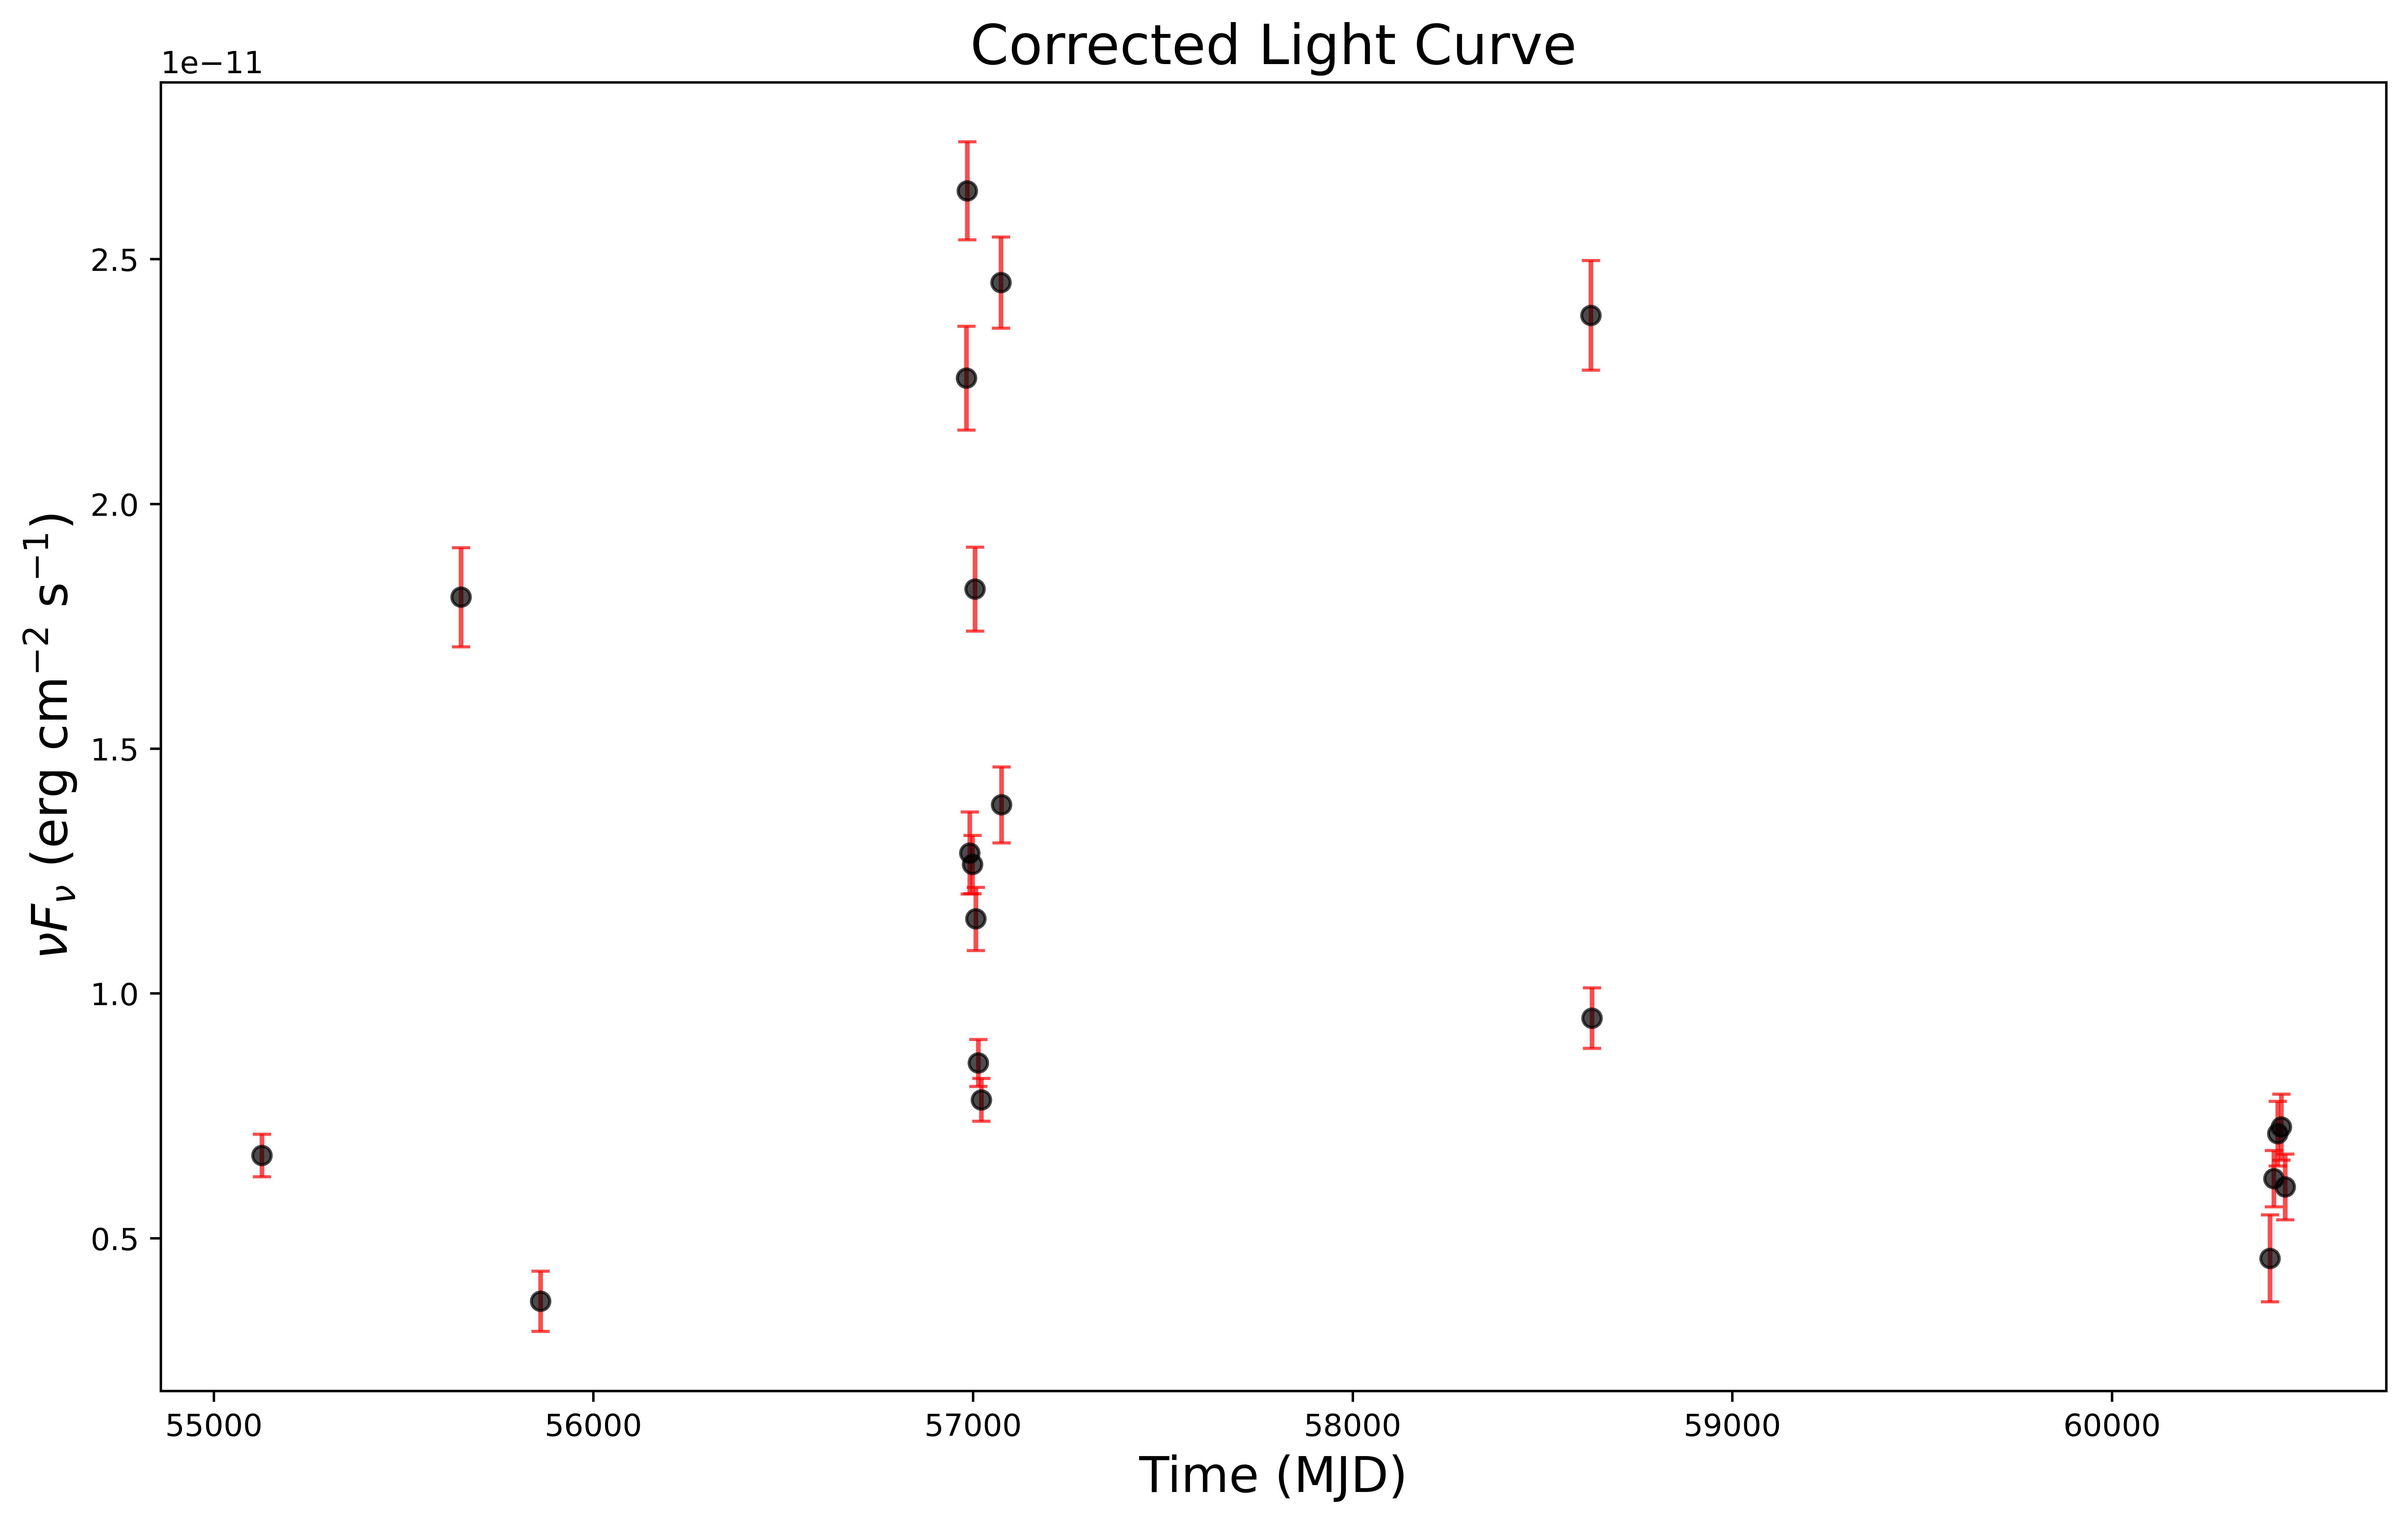

In [3]:
ext_correction = ExtinctionCorrectionUVOTLC(time, mag, magerr, method="New", filter_name="V", A=0.3864)
results = ext_correction.perform_correction()
ext_correction.save_results(results, output_file='demo_lightcurve')
ext_correction.plot_results(results)